In [93]:
#Import the Necessary libraries
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf


In [94]:
#Import the dataset
df = pd.read_csv(r"C:\Users\jwh28\Downloads\data_clean.csv")

In [95]:
#Data Cleaning

df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

df["Demographics"] = df["Demographics"].map({"Urban": 1, "Rural": 0})

df = df.dropna(subset=["Gender"])
df["Gender"] = df["Gender"].astype(int)

print("Unique values in Gender:", df["Gender"].unique())
print("Unique values in Demographics:", df["Demographics"].unique())


Unique values in Gender: [1 0]
Unique values in Demographics: [0 1]


In [96]:
#Predicting Addiction Level
predictors = ["Age", "Gender", "Income", "Debt", "Owns Property", "Demographics"]

X = df[predictors].copy()
y = df["Addiction Level"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model[predictors]
y_model = data_model["Addiction Level"]

X_model = sm.add_constant(X_model)

model_addiction = sm.OLS(y_model, X_model).fit()

print(model_addiction.summary())


                            OLS Regression Results                            
Dep. Variable:        Addiction Level   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9751
Date:                Thu, 10 Apr 2025   Prob (F-statistic):              0.441
Time:                        22:44:59   Log-Likelihood:                -1794.7
No. Observations:                 836   AIC:                             3603.
Df Residuals:                     829   BIC:                             3636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0081      0.340      8.838

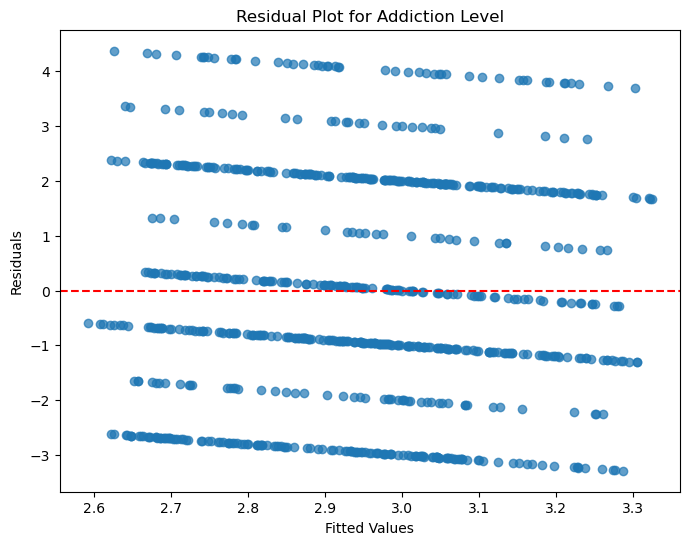

In [97]:
#Residual Plot for Addiction Level
fitted_vals = model_addiction.predict(X_model)
residuals = y_model - fitted_vals

plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Addiction Level')
plt.show()

In [98]:
#Address Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["High VIF"] = vif_data["VIF"] > 5


print("\nOriginal Variance Inflation Factors:")
print(vif_data)


Original Variance Inflation Factors:
         feature        VIF  High VIF
0            Age   6.246518      True
1         Gender   2.425855     False
2         Income  17.295516      True
3           Debt   7.740151      True
4  Owns Property   2.015959     False
5   Demographics   1.314282     False


In [99]:
#Fix Multicollinearity  
predictors_reduced = ["Gender", "Owns Property", "Demographics"]
X = df[predictors_reduced].copy()
y = df["Addiction Level"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model[predictors_reduced]
y_model = data_model["Addiction Level"]

X_model = sm.add_constant(X_model)

model_addiction = sm.OLS(y_model, X_model).fit()

print(model_addiction.summary())

                            OLS Regression Results                            
Dep. Variable:        Addiction Level   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.103
Date:                Thu, 10 Apr 2025   Prob (F-statistic):              0.347
Time:                        22:44:59   Log-Likelihood:                -1796.0
No. Observations:                 836   AIC:                             3600.
Df Residuals:                     832   BIC:                             3619.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0496      0.145     20.978

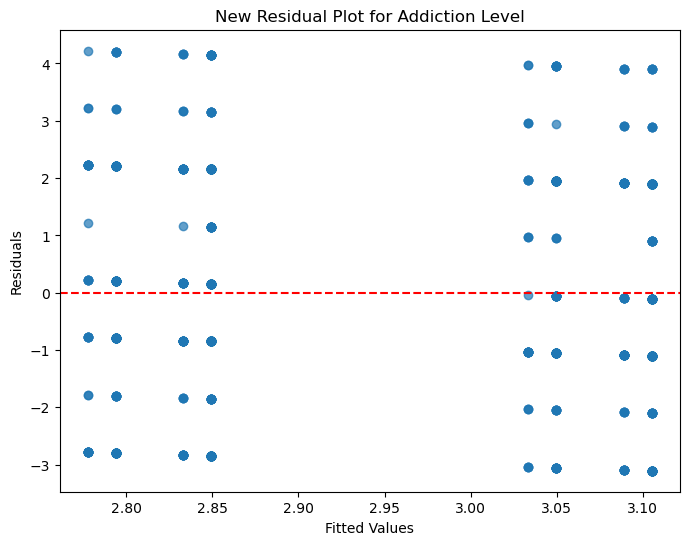

In [100]:
#New Residual Plot for Addiction Level
fitted_vals = model_addiction.predict(X_model)
residuals = y_model - fitted_vals

plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('New Residual Plot for Addiction Level')
plt.show()

In [101]:
#Predicting Total Time Spent
predictors = ["Age", "Gender", "Income", "Debt", "Owns Property", "Demographics"]

X = df[predictors].copy()
y = df["Total Time Spent"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model[predictors]
y_model = data_model["Total Time Spent"]

X_model = sm.add_constant(X_model)

model_total_time = sm.OLS(y_model, X_model).fit()

print(model_total_time.summary())


                            OLS Regression Results                            
Dep. Variable:       Total Time Spent   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7854
Date:                Thu, 10 Apr 2025   Prob (F-statistic):              0.581
Time:                        22:44:59   Log-Likelihood:                -4893.1
No. Observations:                 836   AIC:                             9800.
Df Residuals:                     829   BIC:                             9833.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           145.2882     13.854     10.487

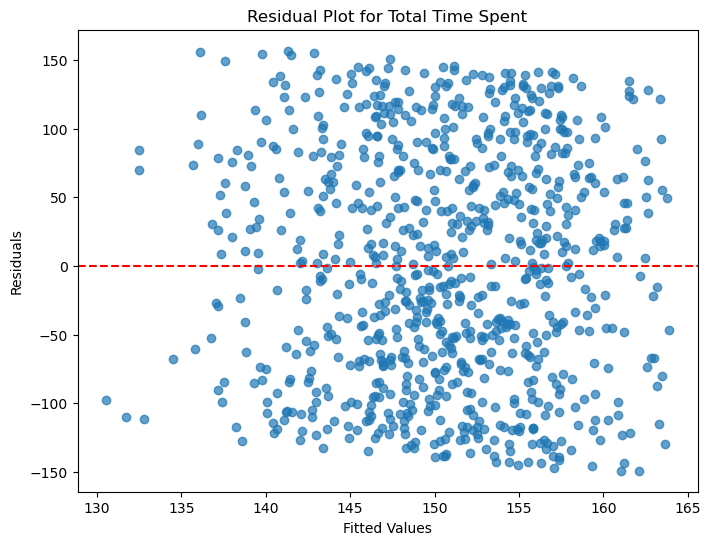

In [102]:
#Residual Plot for Total Time Spent
fitted_vals = model_total_time.predict(X_model)
residuals = y_model - fitted_vals

plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Total Time Spent')
plt.show()

In [103]:
#Address Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["High VIF"] = vif_data["VIF"] > 5


print("\nOriginal Variance Inflation Factors:")
print(vif_data)


Original Variance Inflation Factors:
         feature        VIF  High VIF
0            Age   6.246518      True
1         Gender   2.425855     False
2         Income  17.295516      True
3           Debt   7.740151      True
4  Owns Property   2.015959     False
5   Demographics   1.314282     False


In [104]:
#Fix Multicollinearity  
predictors_reduced = ["Gender", "Owns Property", "Demographics"]
X = df[predictors_reduced].copy()
y = df["Total Time Spent"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model[predictors_reduced]
y_model = data_model["Total Time Spent"]

X_model = sm.add_constant(X_model)

model_total_time = sm.OLS(y_model, X_model).fit()

print(model_total_time.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Time Spent   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7923
Date:                Thu, 10 Apr 2025   Prob (F-statistic):              0.498
Time:                        22:44:59   Log-Likelihood:                -4894.3
No. Observations:                 836   AIC:                             9797.
Df Residuals:                     832   BIC:                             9816.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           153.1725      5.916     25.890

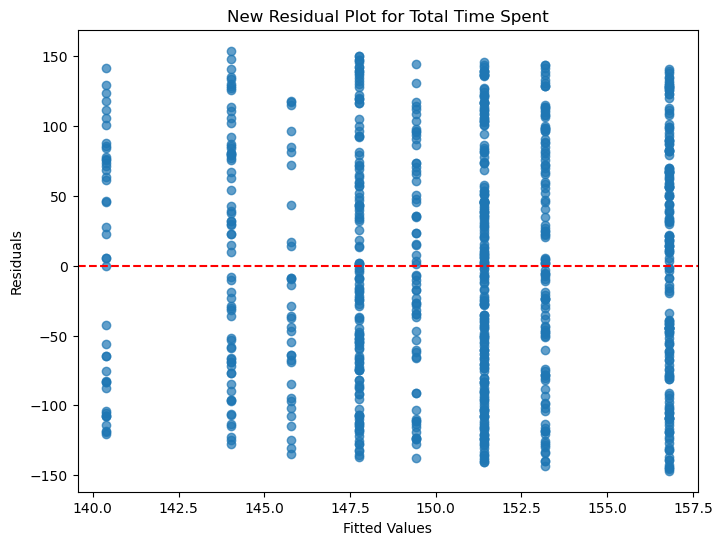

In [105]:
#New Residual Plot for Total Time Spent
fitted_vals = model_total_time.predict(X_model)
residuals = y_model - fitted_vals

plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('New Residual Plot for Total Time Spent')
plt.show()

In [106]:
#Precting Number of Videos Watched
predictors = ["Age", "Gender", "Income", "Debt", "Owns Property", "Demographics"]

X = df[predictors].copy()
y = df["Number of Videos Watched"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model[predictors]
y_model = data_model["Number of Videos Watched"]

X_model = sm.add_constant(X_model)

model_videos = sm.OLS(y_model, X_model).fit()

print(model_videos.summary())


                               OLS Regression Results                               
Dep. Variable:     Number of Videos Watched   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.002
Method:                       Least Squares   F-statistic:                     1.231
Date:                      Thu, 10 Apr 2025   Prob (F-statistic):              0.288
Time:                              22:45:00   Log-Likelihood:                -3384.3
No. Observations:                       836   AIC:                             6783.
Df Residuals:                           829   BIC:                             6816.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

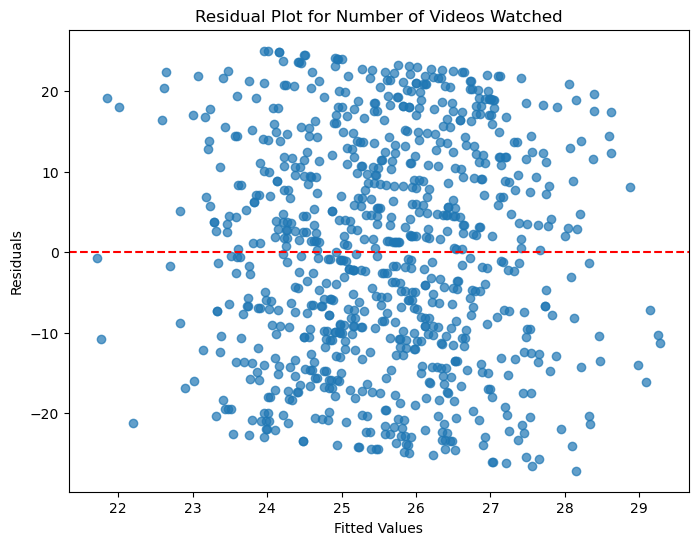

In [107]:
#Residual Plot for Number of Videos Watched
fitted_vals = model_videos.predict(X_model)
residuals = y_model - fitted_vals

plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Number of Videos Watched')
plt.show()

In [108]:
#Address Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["High VIF"] = vif_data["VIF"] > 5


print("\nOriginal Variance Inflation Factors:")
print(vif_data)


Original Variance Inflation Factors:
         feature        VIF  High VIF
0            Age   6.246518      True
1         Gender   2.425855     False
2         Income  17.295516      True
3           Debt   7.740151      True
4  Owns Property   2.015959     False
5   Demographics   1.314282     False


In [109]:
#Fix Multicollinearity
predictors_reduced = ["Gender", "Owns Property", "Demographics"]
X = df[predictors_reduced].copy()
y = df["Number of Videos Watched"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model[predictors_reduced]
y_model = data_model["Number of Videos Watched"]

X_model = sm.add_constant(X_model)

model_videos = sm.OLS(y_model, X_model).fit()

print(model_videos.summary())

                               OLS Regression Results                               
Dep. Variable:     Number of Videos Watched   R-squared:                       0.004
Model:                                  OLS   Adj. R-squared:                  0.001
Method:                       Least Squares   F-statistic:                     1.170
Date:                      Thu, 10 Apr 2025   Prob (F-statistic):              0.320
Time:                              22:45:00   Log-Likelihood:                -3386.2
No. Observations:                       836   AIC:                             6780.
Df Residuals:                           832   BIC:                             6799.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

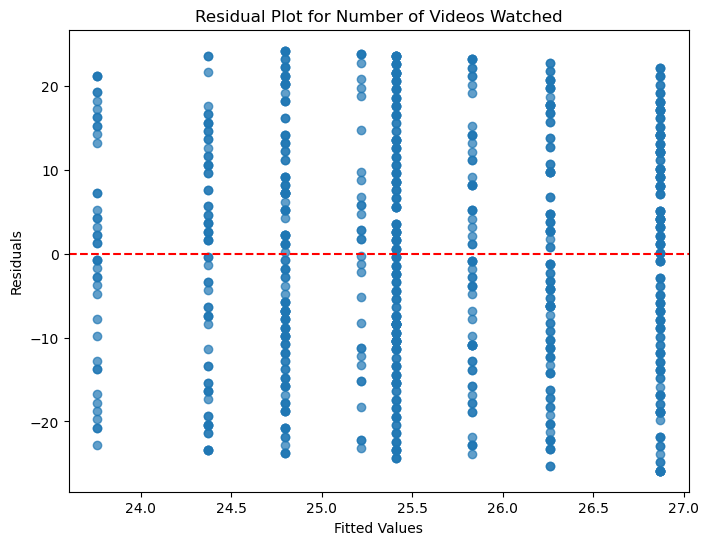

In [110]:
#New Residual Plot for Number of Videos Watched
fitted_vals = model_videos.predict(X_model)
residuals = y_model - fitted_vals

plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Number of Videos Watched')
plt.show()